# @@@  credit score segmentation --- supervised  @@@

In [5]:
# credit score segmentation project focuses on transforming unsupervised data into a supervised learning 
# problem by creating a risk flag feature. This flag determines whether a customer is at low risk,
# risky, or very risky, based on their credit utilization ratio and payment history.

# data preprocessing techniques such as KNN Imputer for handling missing values and MinMaxScaler for normalization.
# Feature Engineering:
# Created a risk flag based on credit utilization and payment history.

# Encoded categorical variables using LabelEncoder and OneHotEncoder.

# Model Training & Evaluation:

# Implemented Random Forest, Decision Tree, Logistic Regression,XGboost and SVM to predict risk levels.

# Applied cross-validation to optimize model performance.

# Evaluated models using accuracy, precision, recall, F1-score,

# Customers with low credit utilization and consistent payment history are classified as low risk.

# Those with high credit utilization and irregular payments are flagged as risky.

# The segmentation helps in credit risk management and loan approval decisions.

In [ ]:
# in credit score segmentation i want to unsupervised data into supervised data to create a target feature 
# that is RISK FLAG for customer when customer have low credit utilization ratio is there 
# then customer have low risk other wise customer have a risk depending on the payment history and credit utilization i will create a risk flag feature
# target : whether customer have risky or good or very risky i want predict based on the conditions

# import  necessary libraries for dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    mean_squared_error, mean_absolute_error, r2_score, confusion_matrix
)
import  warnings
warnings.filterwarnings("ignore")

# load the dataset

In [2]:

df = pd.read_csv("C:\\Users\\mmoun\\Downloads\\credit_scoring.csv")
# retrieve the data 
df

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan
...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,Male,Divorced,High School,Employed,0.74,1285.0,8,3530000,12.99,48,Auto Loan
996,64,Male,Divorced,Bachelor,Unemployed,0.77,1857.0,2,1377000,18.02,60,Home Loan
997,63,Female,Single,Master,Self-Employed,0.18,2628.0,10,2443000,18.95,12,Personal Loan
998,51,Female,Married,PhD,Self-Employed,0.32,1142.0,3,1301000,1.80,24,Auto Loan


In [6]:
# load the first five rows using head()
df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


In [7]:
# shape retrieve the rows and columns for dataset in this data 1000 rows and 12 columns
df.shape

(1000, 12)

In [ ]:
# --> observation: shape retrive the rows and columns 

In [4]:
# retrieve the all features
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Education Level',
       'Employment Status', 'Credit Utilization Ratio', 'Payment History',
       'Number of Credit Accounts', 'Loan Amount', 'Interest Rate',
       'Loan Term', 'Type of Loan'],
      dtype='object')

In [8]:
# retrieve the data types whether it is int,float,object(catgorical features)
df.dtypes

Age                            int64
Gender                        object
Marital Status                object
Education Level               object
Employment Status             object
Credit Utilization Ratio     float64
Payment History              float64
Number of Credit Accounts      int64
Loan Amount                    int64
Interest Rate                float64
Loan Term                      int64
Type of Loan                  object
dtype: object

# Data Preprocessing

In [9]:
# -->Number of entries (rows) and columns
# -->Column names and data types (int, float, object, etc.)
# -->Number of non-null values (useful for identifying missing data)
# -->Memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [10]:
# df.describe() function in pandas provides summary statistics for numerical columns in your dataset.
# Count --> Number of non-null values in each column.
# Mean -->  Average value for each numerical column.
# Std -->  Standard deviation (helps measure variability).
# Min --> Minimum value in each column.
# 25%, 50%, 75% Percentiles → Quartiles that indicate distribution trends.
# Max --> Highest value in each column.

df.describe()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,42.702000,0.509950,1452.814000,5.580000,2.471401e+06,10.686600,37.128000
std,13.266771,0.291057,827.934146,2.933634,1.387047e+06,5.479058,17.436274
min,20.000000,0.000000,0.000000,1.000000,1.080000e+05,1.010000,12.000000
25%,31.000000,0.250000,763.750000,3.000000,1.298000e+06,6.022500,24.000000
50%,42.000000,0.530000,1428.000000,6.000000,2.437500e+06,10.705000,36.000000
75%,54.000000,0.750000,2142.000000,8.000000,3.653250e+06,15.440000,48.000000
max,65.000000,1.000000,2857.000000,10.000000,4.996000e+06,19.990000,60.000000


In [11]:
# handle missing values count the missing values or null values
df.isnull().sum()

Age                          0
Gender                       0
Marital Status               0
Education Level              0
Employment Status            0
Credit Utilization Ratio     0
Payment History              0
Number of Credit Accounts    0
Loan Amount                  0
Interest Rate                0
Loan Term                    0
Type of Loan                 0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [ ]:
#--> check the how many duplicated are in data

In [12]:
# simpleimputer for dataframe of all features
imputer = SimpleImputer(strategy = 'most_frequent')
imputed_data = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed_data,columns = df.columns)
df_imputed.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.2,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


# Feature Engineering

Risk Flag
good          827
Risky         112
very risky     61
Name: count, dtype: int64


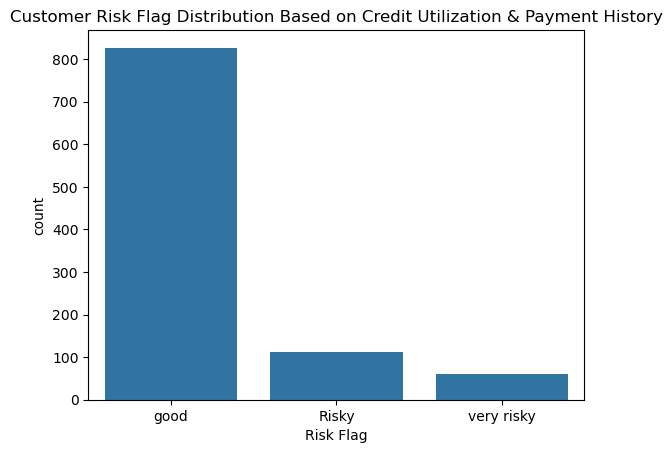

     Age  Gender Marital Status Education Level Employment Status  \
0     60    Male        Married          Master          Employed   
1     25    Male        Married     High School        Unemployed   
2     30  Female         Single          Master          Employed   
3     58  Female        Married             PhD        Unemployed   
4     32    Male        Married        Bachelor     Self-Employed   
..   ...     ...            ...             ...               ...   
995   59    Male       Divorced     High School          Employed   
996   64    Male       Divorced        Bachelor        Unemployed   
997   63  Female         Single          Master     Self-Employed   
998   51  Female        Married             PhD     Self-Employed   
999   37  Female        Married          Master     Self-Employed   

     Credit Utilization Ratio  Payment History  Number of Credit Accounts  \
0                        0.22           2685.0                          2   
1                

In [13]:
# feature engineering:create a target feature is risk flag based upon the payment history and credit utilization ratio
# feature engineering to create new feature risk flag:
# FICO scores range from 300 to 850, with different risk categories:
# Good (740-799) → Low risk, reliable borrower.
# Poor (580-669) → High risk, potential default concerns.
# Very Poor (300-579) → Very high risk, significant credit problems. 

def derive_customer_riskflag (row):
        if  row['Payment History']>=740 or row["Credit Utilization Ratio"]<=0.30:
            return 'good'
        elif row['Payment History']>= 580 or row["Credit Utilization Ratio"]<=0.70:
            return 'Risky'
        else:
            return 'very risky'
           
# Apply function to create risk flag
df['Risk Flag'] = df.apply(derive_customer_riskflag, axis=1)

# Check distribution of risk flags
print(df['Risk Flag'].value_counts())

# Visualizing Risk Flag Distribution
sns.countplot(x=df["Risk Flag"])
plt.title("Customer Risk Flag Distribution Based on Credit Utilization & Payment History")
plt.show()
#---very risky=2 ,good=1,risky=0
print(df)

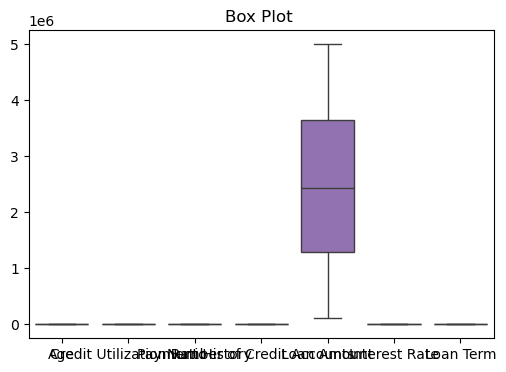

In [14]:
#Box plot
#Boxplots are a graphical way to visualize the distribution of data and detect outliers.
# Outliers are typically any values that lie outside the "whiskers" of the boxplot
#(i.e., outside the range of 𝑄 1 − 1.5 × 𝐼 𝑄 𝑅 Q1−1.5×IQR and 𝑄 3 + 1.5 × 𝐼 𝑄 𝑅 Q3+1.5×IQR).

# before remove the outlier
plt.figure(figsize=(6,4))
sns.boxplot(df) 
plt.title('Box Plot ')
plt.show()

Empty DataFrame
Columns: [Age, Gender, Marital Status, Education Level, Employment Status, Credit Utilization Ratio, Payment History, Number of Credit Accounts, Loan Amount, Interest Rate, Loan Term, Type of Loan, Risk Flag]
Index: []
IQR is :2355250.0
 lower_bound is:-2234875.0
 upper bound is :7186125.0


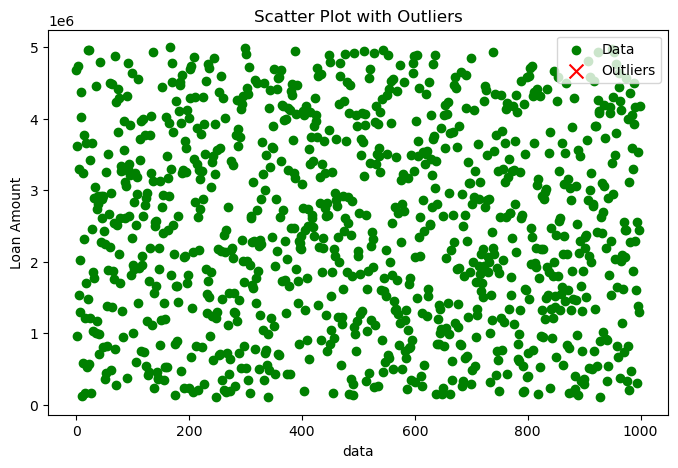

In [15]:
# Detect outliers using IQR 
# we can use boxplot (or) scatter plot for detecting the outliers

Q1 = df['Loan Amount'].quantile(0.25)
Q3 = df['Loan Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Loan Amount'] < lower_bound) | (df['Loan Amount'] > upper_bound)]
print(outliers)
print(f"IQR is :{IQR}\n lower_bound is:{lower_bound}\n upper bound is :{upper_bound}")

# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df.index,df['Loan Amount'], label='Data', color='green')
plt.scatter(outliers.index, outliers['Loan Amount'], label='Outliers', color='red', marker='x', s=100)
plt.xlabel('data')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot with Outliers')
plt.legend()
plt.show()

In [ ]:
--> observation: in this scatter plot there is no outliers. 

In [16]:
# Remove the outlier all columns by using functions of IQR method
def remove_outliers(df,columns):
    df_filtered =df.copy()

    for col in columns:
         Q1 = df[col].quantile(0.25)
         Q3 = df[col].quantile(0.75)
         IQR = Q3-Q1

         lower_whisker = Q1  -  1.5   *   IQR
         upper_whisker = Q3  +  1.5   *   IQR

         df_filtered = df_filtered[(df_filtered[col]<= lower_whisker) | (df_filtered[col]>=upper_whisker)]
    return df_filtered


In [17]:
df1 = remove_outliers(df,['Age','Credit Utilization Ratio','Payment History',
                      'Number of Credit Accounts','Loan Amount','Interest Rate','Loan Term'])

df1

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Risk Flag


In [18]:
# check the skewness of numerical columns 
df1.skew(numeric_only = True)

Age                         NaN
Credit Utilization Ratio    NaN
Payment History             NaN
Number of Credit Accounts   NaN
Loan Amount                 NaN
Interest Rate               NaN
Loan Term                   NaN
dtype: float64

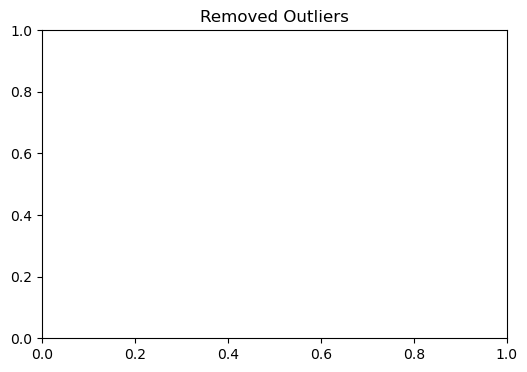

In [19]:
# after removed the outliers
plt.figure(figsize=(6,4))
sns.boxplot(df1)
plt.title("Removed Outliers")
plt.show()

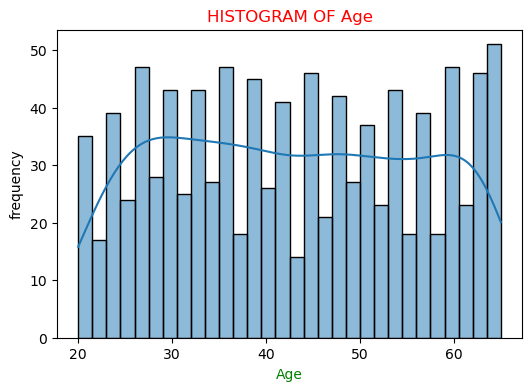

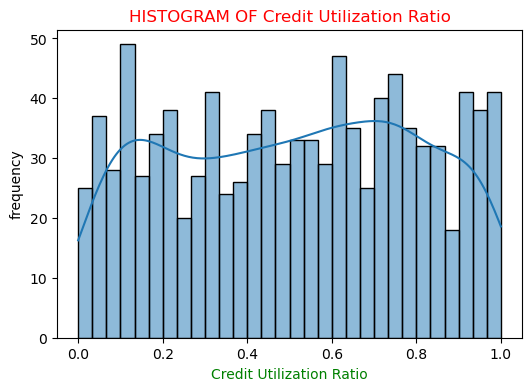

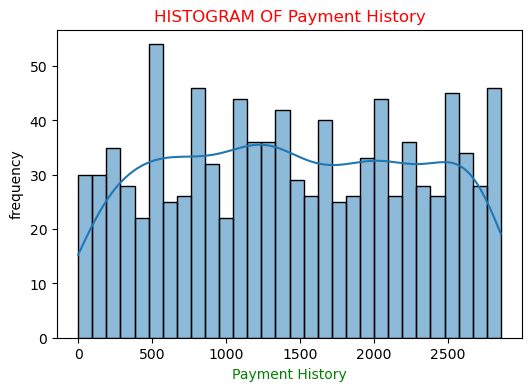

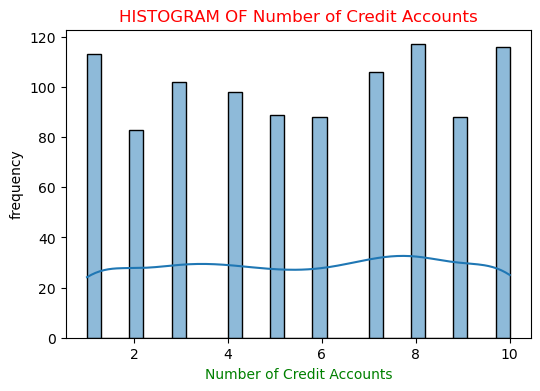

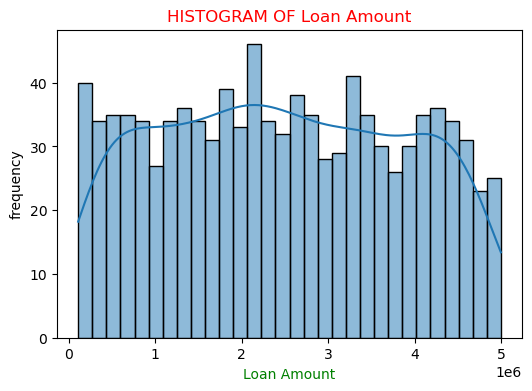

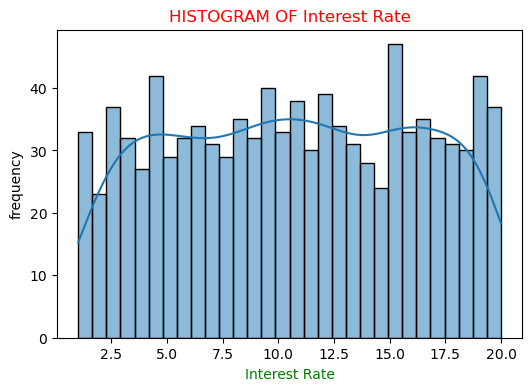

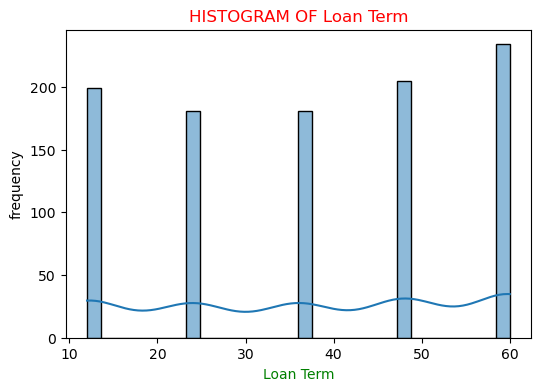

In [20]:
##Histogram
#Histograms with KDE are an excellent way to explore the distribution of your data
#visually before proceeding with any data transformations or outlier removal.
# In Seaborn's histplot, kde=True enables the Kernel Density Estimation (KDE)
# which helps visualize the distribution shape of the data by smoothing it into a continuous curve

# create a histplot for each numerical columns before remove the outliers

for column in df.select_dtypes(include = ['float64','int64']).columns:
    plt.figure(figsize=(6,4))            
    sns.histplot(df[column],kde = True,bins = 30)    
    plt.title(f"HISTOGRAM OF {column}",color = "red")
    plt.xlabel(column,color = 'green')
    plt.ylabel('frequency')
plt.show()
                

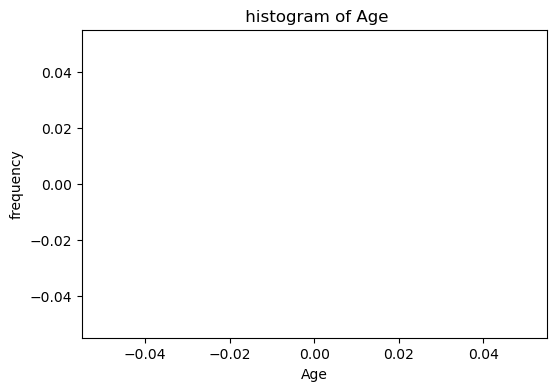

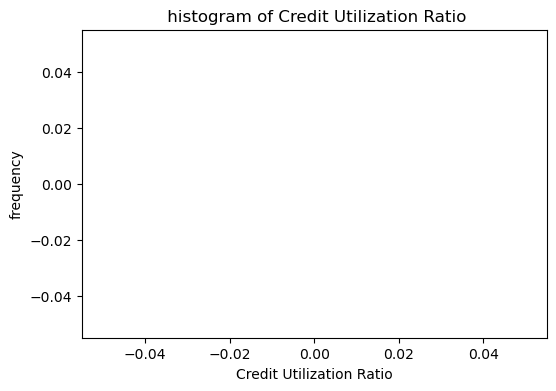

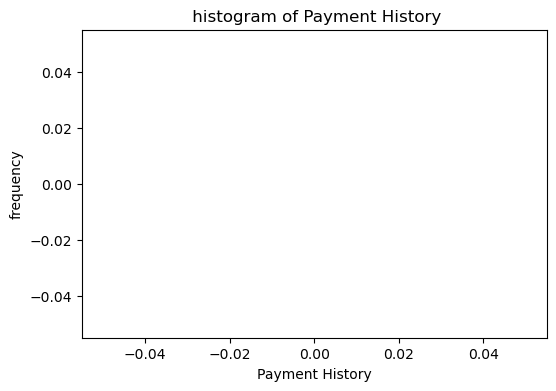

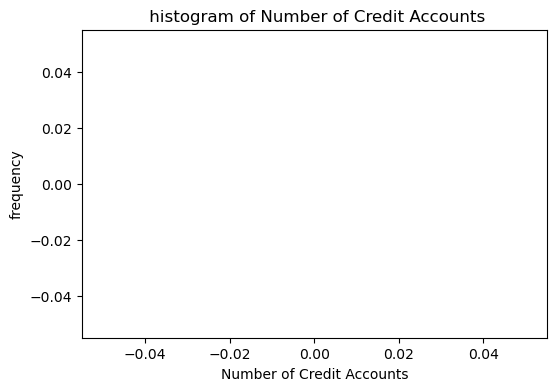

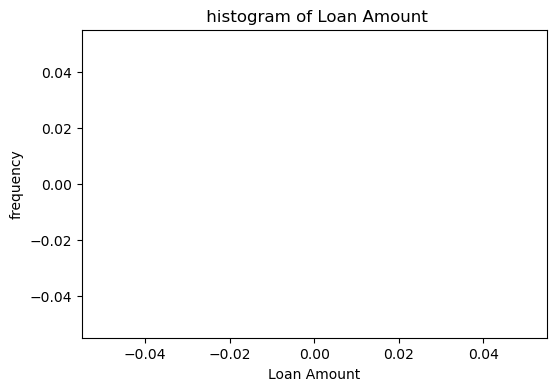

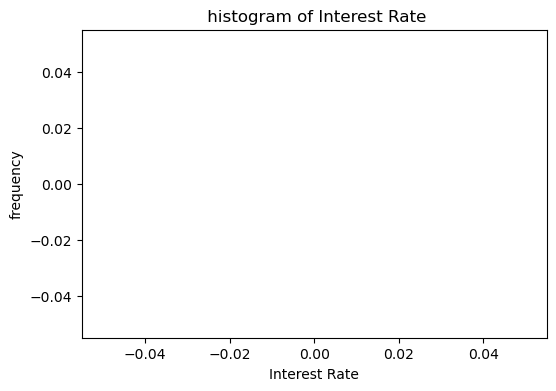

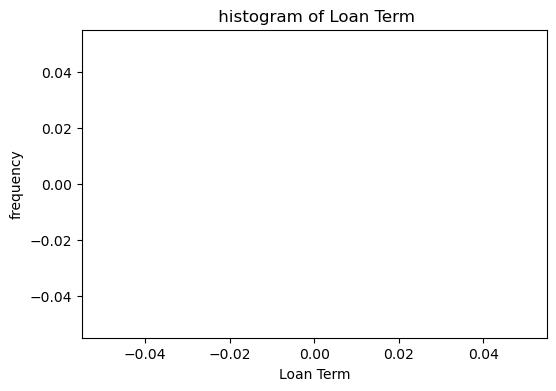

In [21]:
# A distribution that is skewed to the right (positive skew) or left (negative skew)
# can indicate that there may be outliers, especially if there’s a long tail.
# If the histogram has multiple peaks, it could indicate the presence of different subgroups in the data or errors.
# Outliers might appear as bars far away from the rest of the data.


# create a histplot for each columns after remove the outliers

for column in  df.select_dtypes(include = ['float64','int64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df1[column],kde = True)
    plt.title(f" histogram of {column}")
    plt.xlabel(column)
    plt.ylabel('frequency')
plt.show()


In [22]:
# To plotting histograms (with KDE) of each column after removing the outliers looks almost perfect.
#  However, the only thing to check is whether you're using the correct DataFrame
#  (df1) after outlier removal. From the previous code you shared,
#  I assume that df1 is the DataFrame with outliers removed, so make sure df1 is
#  correctly defined and contains the filtered data. df1 should contain our data
#  after the outlier removal. This will generate histograms for each numerical column,
#  displaying the distribution of data after outliers have been removed.


# checking skewness after removed outlier
df1.skew(numeric_only=True)

Age                         NaN
Credit Utilization Ratio    NaN
Payment History             NaN
Number of Credit Accounts   NaN
Loan Amount                 NaN
Interest Rate               NaN
Loan Term                   NaN
dtype: float64

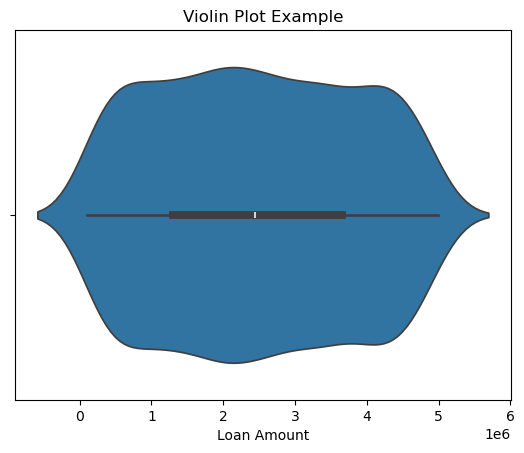

In [23]:
# Create violin plot
sns.violinplot(x=df["Loan Amount"], data=df)
plt.title("Violin Plot Example")
plt.show()

In [24]:
# normalization:
features = ['Age','Credit Utilization Ratio','Payment History',
            'Number of Credit Accounts','Loan Amount','Interest Rate','Loan Term']

scaler = MinMaxScaler()
df_selected = df[features]
scaled_data = scaler.fit_transform(df_selected)
df_normalized = pd.DataFrame(scaled_data, columns=features)

print(df_normalized)

          Age  Credit Utilization Ratio  Payment History  \
0    0.888889                      0.22         0.939797   
1    0.111111                      0.20         0.829891   
2    0.222222                      0.22         0.969898   
3    0.844444                      0.12         0.479874   
4    0.266667                      0.99         0.289814   
..        ...                       ...              ...   
995  0.866667                      0.74         0.449772   
996  0.977778                      0.77         0.649982   
997  0.955556                      0.18         0.919846   
998  0.688889                      0.32         0.399720   
999  0.377778                      0.17         0.359818   

     Number of Credit Accounts  Loan Amount  Interest Rate  Loan Term  
0                     0.111111     0.934329       0.086407       0.75  
1                     0.888889     0.718290       0.220232       1.00  
2                     0.555556     0.173691       0.092202     

In [25]:
# label encoder
categorical_features = ['Gender','Marital Status','Education Level','Employment Status','Type of Loan','Risk Flag']
label = LabelEncoder()

for col in categorical_features:
    df[col] = label.fit_transform(df[col])

# encoding target variable:
df['Risk Flag'] = label.fit_transform(df['Risk Flag']) # very risk = 2,risky=0,good=1
df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Risk Flag
0,60,1,1,2,0,0.22,2685.0,2,4675000,2.65,48,2,1
1,25,1,1,1,2,0.20,2371.0,9,3619000,5.19,60,0,1
2,30,0,2,2,0,0.22,2771.0,6,957000,2.76,12,0,1
3,58,0,1,3,2,0.12,1371.0,2,4731000,6.57,60,0,1
4,32,1,1,0,1,0.99,828.0,2,3289000,6.28,36,2,1


In [26]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Apply imputation
df_imputed = imputer.fit_transform(df)

print("Data after KNN Imputation:\n", df_imputed)

Data after KNN Imputation:
 [[60.  1.  1. ... 48.  2.  1.]
 [25.  1.  1. ... 60.  0.  1.]
 [30.  0.  2. ... 12.  0.  1.]
 ...
 [63.  0.  2. ... 12.  2.  1.]
 [51.  0.  1. ... 24.  0.  1.]
 [37.  0.  1. ... 24.  0.  1.]]


In [27]:
# here target as Risk Flag
x = df.drop(['Risk Flag'],axis=1)
y = df['Risk Flag']


In [28]:
# feature scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [29]:
# split the data 
x_train, x_test, y_train, y_test = train_test_split( x_scaled, y, test_size = 0.2,random_state=42,stratify = y)

In [30]:
# Train the models (classification)
# Step 3: Get Models
def get_models():
    return {
        'Logistic Regression': LogisticRegression(max_iter=200),
        'Random Forest': RandomForestClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'SVM': SVC(probability=True),
        'Bagging': BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10),
        'XGBoost': XGBClassifier(),
        'KNN': KNeighborsClassifier()
    }


In [31]:
# evaluate metrics
def evaluate_model(y_test, y_pred, y_prob=None, average='weighted'):
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average=average, zero_division=0),
        'Recall': recall_score(y_test, y_pred, average=average, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, average=average, zero_division=0),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred),
        'R2 Score': r2_score(y_test, y_pred),
    }
    return metrics

In [32]:
# train and evalulate
def train_and_evaluate(models, x_train, x_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        # Probability predictions if available
        y_prob = model.predict_proba(x_test) if hasattr(model, "predict_proba") else None

        metrics = evaluate_model(y_test, y_pred, y_prob)
        results[name] = metrics
        # Plot Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix: {name}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.tight_layout()
        plt.show()
        
    # return results.pd.DataFrame(results).T
    
    return results


Training Logistic Regression...


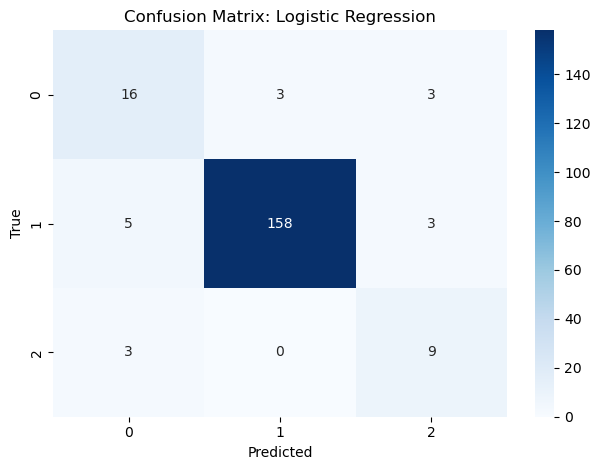


Training Random Forest...


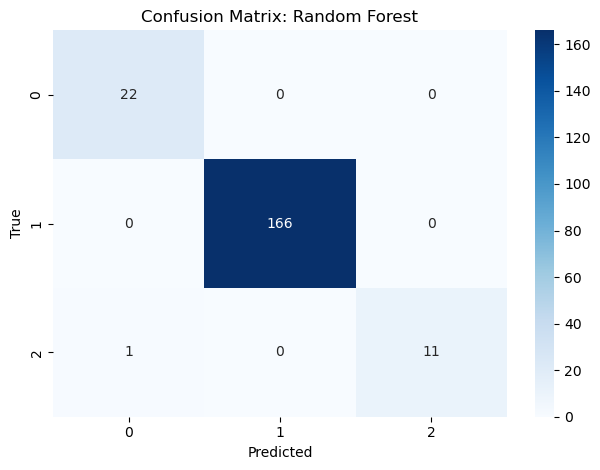


Training Decision Tree...


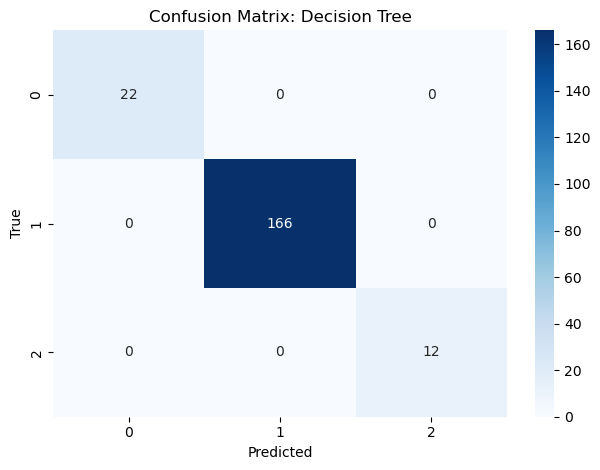


Training SVM...


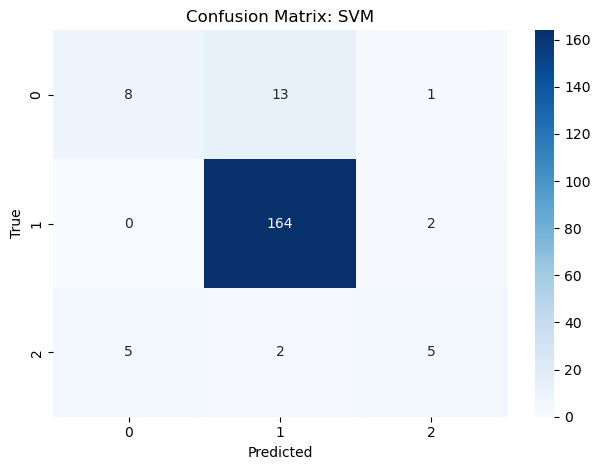


Training Bagging...


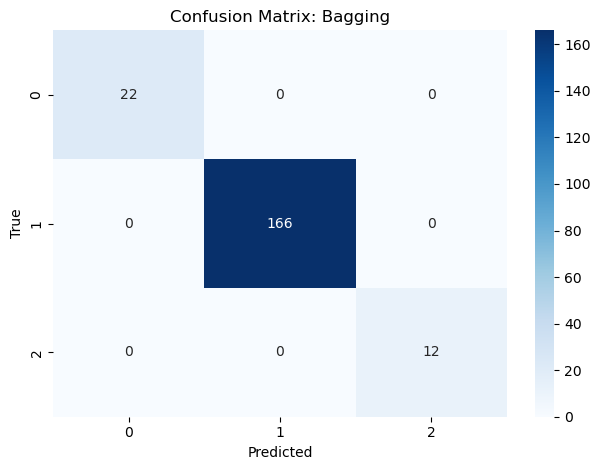


Training XGBoost...


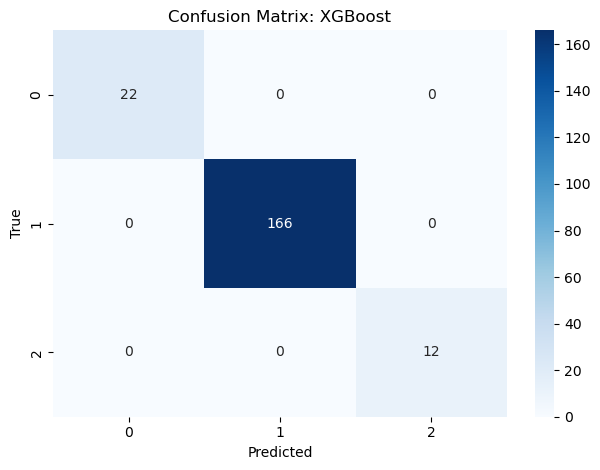


Training KNN...


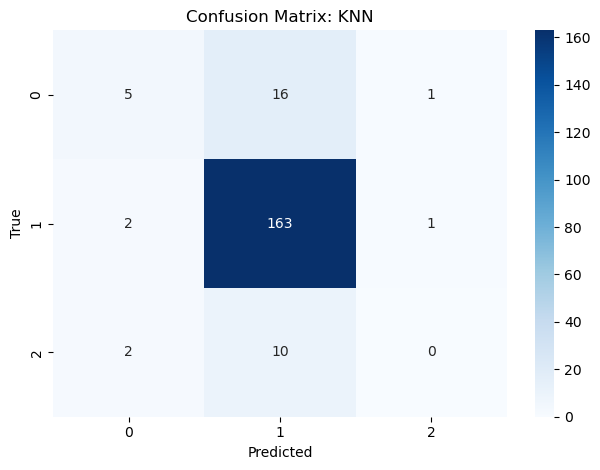

{'Logistic Regression': {'Accuracy': 0.915, 'Precision': 0.9238674948240164, 'Recall': 0.915, 'F1 Score': 0.9186012498337988, 'MAE': 0.115, 'MSE': 0.175, 'RMSE': 0.175, 'R2 Score': -0.04477611940298498}, 'Random Forest': {'Accuracy': 0.995, 'Precision': 0.9952173913043478, 'Recall': 0.995, 'F1 Score': 0.9949468599033817, 'MAE': 0.01, 'MSE': 0.02, 'RMSE': 0.02, 'R2 Score': 0.8805970149253731}, 'Decision Tree': {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0, 'MAE': 0.0, 'MSE': 0.0, 'RMSE': 0.0, 'R2 Score': 1.0}, 'SVM': {'Accuracy': 0.885, 'Precision': 0.8656392350666094, 'Recall': 0.885, 'F1 Score': 0.8693871635610766, 'MAE': 0.145, 'MSE': 0.205, 'RMSE': 0.205, 'R2 Score': -0.22388059701492535}, 'Bagging': {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0, 'MAE': 0.0, 'MSE': 0.0, 'RMSE': 0.0, 'R2 Score': 1.0}, 'XGBoost': {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0, 'MAE': 0.0, 'MSE': 0.0, 'RMSE': 0.0, 'R2 Score': 1.0}, 'KNN': {'

In [33]:
models = get_models()
results = train_and_evaluate(models, x_train, x_test, y_train, y_test)


In [34]:
# display results
df_results = pd.DataFrame(results).T.round(4)
print("\n final Evaluation metrics for all models :\n")
print(df_results)


 final Evaluation metrics for all models :

                     Accuracy  Precision  Recall  F1 Score    MAE    MSE  \
Logistic Regression     0.915     0.9239   0.915    0.9186  0.115  0.175   
Random Forest           0.995     0.9952   0.995    0.9949  0.010  0.020   
Decision Tree           1.000     1.0000   1.000    1.0000  0.000  0.000   
SVM                     0.885     0.8656   0.885    0.8694  0.145  0.205   
Bagging                 1.000     1.0000   1.000    1.0000  0.000  0.000   
XGBoost                 1.000     1.0000   1.000    1.0000  0.000  0.000   
KNN                     0.840     0.7769   0.840    0.7977  0.175  0.205   

                      RMSE  R2 Score  
Logistic Regression  0.175   -0.0448  
Random Forest        0.020    0.8806  
Decision Tree        0.000    1.0000  
SVM                  0.205   -0.2239  
Bagging              0.000    1.0000  
XGBoost              0.000    1.0000  
KNN                  0.205   -0.2239  


In [35]:
# sort by preferred metric
print("models sorted by f1 score:")
print(df_results.sort_values(by = "F1 Score",ascending = False))


models sorted by f1 score:
                     Accuracy  Precision  Recall  F1 Score    MAE    MSE  \
Decision Tree           1.000     1.0000   1.000    1.0000  0.000  0.000   
Bagging                 1.000     1.0000   1.000    1.0000  0.000  0.000   
XGBoost                 1.000     1.0000   1.000    1.0000  0.000  0.000   
Random Forest           0.995     0.9952   0.995    0.9949  0.010  0.020   
Logistic Regression     0.915     0.9239   0.915    0.9186  0.115  0.175   
SVM                     0.885     0.8656   0.885    0.8694  0.145  0.205   
KNN                     0.840     0.7769   0.840    0.7977  0.175  0.205   

                      RMSE  R2 Score  
Decision Tree        0.000    1.0000  
Bagging              0.000    1.0000  
XGBoost              0.000    1.0000  
Random Forest        0.020    0.8806  
Logistic Regression  0.175   -0.0448  
SVM                  0.205   -0.2239  
KNN                  0.205   -0.2239  


In [36]:
# sorted by multiple metrics
print("models sorted by F1 Score:")
print(df_results.sort_values(by = ["F1 Score","R2 Score"],ascending = False))


models sorted by F1 Score:
                     Accuracy  Precision  Recall  F1 Score    MAE    MSE  \
Decision Tree           1.000     1.0000   1.000    1.0000  0.000  0.000   
Bagging                 1.000     1.0000   1.000    1.0000  0.000  0.000   
XGBoost                 1.000     1.0000   1.000    1.0000  0.000  0.000   
Random Forest           0.995     0.9952   0.995    0.9949  0.010  0.020   
Logistic Regression     0.915     0.9239   0.915    0.9186  0.115  0.175   
SVM                     0.885     0.8656   0.885    0.8694  0.145  0.205   
KNN                     0.840     0.7769   0.840    0.7977  0.175  0.205   

                      RMSE  R2 Score  
Decision Tree        0.000    1.0000  
Bagging              0.000    1.0000  
XGBoost              0.000    1.0000  
Random Forest        0.020    0.8806  
Logistic Regression  0.175   -0.0448  
SVM                  0.205   -0.2239  
KNN                  0.205   -0.2239  


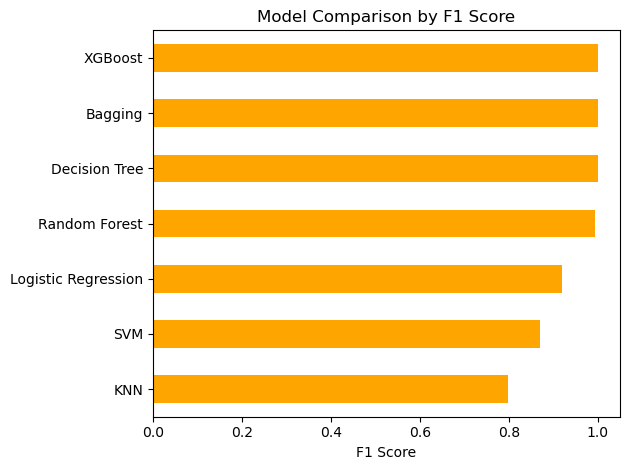

In [48]:
# Vizualize for clarity
import matplotlib.pyplot as plt

# Plot F1 scores for all models
df_results["F1 Score"].sort_values().plot(kind='barh', title="Model Comparison by F1 Score", color='orange')
plt.xlabel("F1 Score")
plt.tight_layout()
plt.show()

In [44]:
# Ranking(The model with the lowest average rank is your overall best performer.)
# ranking = df_results.rank(ascending=False)
# ranking["Average Rank"] = ranking.mean(axis=1)
# print(ranking.sort_values("Average Rank"))
ranking.rename(columns={"Average\xa0Rank": "Average Rank"}, inplace=True)
print(ranking.sort_values("Average Rank"))


                     Accuracy  Precision  Recall  F1 Score  MAE  MSE  RMSE  \
Decision Tree             2.0        2.0     2.0       2.0  6.0  6.0   6.0   
Bagging                   2.0        2.0     2.0       2.0  6.0  6.0   6.0   
XGBoost                   2.0        2.0     2.0       2.0  6.0  6.0   6.0   
Random Forest             4.0        4.0     4.0       4.0  4.0  4.0   4.0   
Logistic Regression       5.0        5.0     5.0       5.0  3.0  3.0   3.0   
SVM                       6.0        6.0     6.0       6.0  2.0  1.5   1.5   
KNN                       7.0        7.0     7.0       7.0  1.0  1.5   1.5   

                     R2 Score  Average Rank  
Decision Tree             2.0        3.5000  
Bagging                   2.0        3.5000  
XGBoost                   2.0        3.5000  
Random Forest             4.0        4.0000  
Logistic Regression       5.0        4.2500  
SVM                       6.5        4.4375  
KNN                       6.5        4.8125  


In [45]:
df_results = pd.DataFrame(results).T.round(4)
ranking = df_results.rank(ascending=False)
ranking["Average Rank"] = ranking.mean(axis=1)
ranking_sorted = ranking.sort_values("Average Rank")

print("📊 Ranked Models:")
print(ranking_sorted)

print("\n🏆 Best Model:")
print(ranking_sorted.index[0])

📊 Ranked Models:
                     Accuracy  Precision  Recall  F1 Score  MAE  MSE  RMSE  \
Decision Tree             2.0        2.0     2.0       2.0  6.0  6.0   6.0   
Bagging                   2.0        2.0     2.0       2.0  6.0  6.0   6.0   
XGBoost                   2.0        2.0     2.0       2.0  6.0  6.0   6.0   
Random Forest             4.0        4.0     4.0       4.0  4.0  4.0   4.0   
Logistic Regression       5.0        5.0     5.0       5.0  3.0  3.0   3.0   
SVM                       6.0        6.0     6.0       6.0  2.0  1.5   1.5   
KNN                       7.0        7.0     7.0       7.0  1.0  1.5   1.5   

                     R2 Score  Average Rank  
Decision Tree             2.0        3.5000  
Bagging                   2.0        3.5000  
XGBoost                   2.0        3.5000  
Random Forest             4.0        4.0000  
Logistic Regression       5.0        4.2500  
SVM                       6.5        4.4375  
KNN                       6.5       

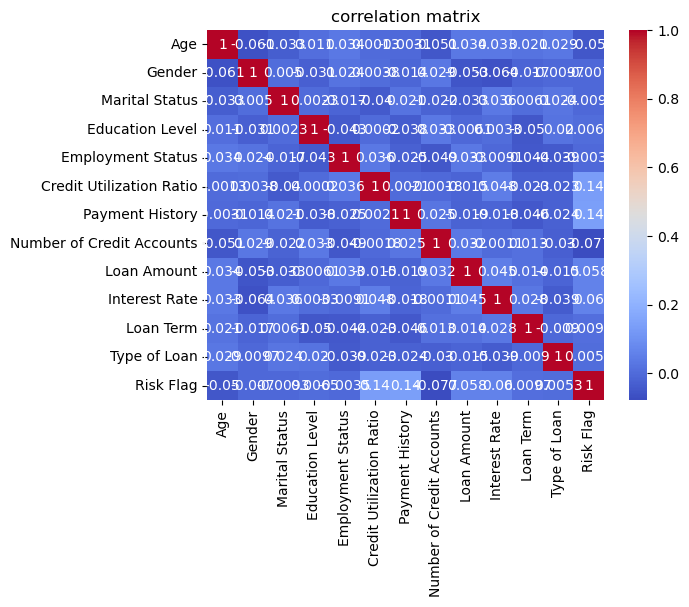

In [46]:
# corelation
corr_matrix = df.corr()
# visualixzing the correlation matrix
sns.heatmap(corr_matrix,annot = True,cmap = 'coolwarm')
plt.title("correlation matrix")
plt.show()


# credit segmentation -- unsupervised learning

In [ ]:
# Problem Description (Input and Output):
# Input: Customer-related data that can include features such as:
# Demographic features: Age, gender, income, etc.
# Behavioral features: Spending habits, purchasing patterns, frequency of visits to the website, etc.

# Output: The model outputs customer segments (groups) based on the similarities among customers. For example:
# Segment 0: High-income, low spending.
# Segment 1: Low-income, frequent shoppers.
# Segment 2: High spending, high engagement.

# Model Output:
# The model assigns a cluster label to each customer, indicating which segment they belong to.
# For example, after clustering, each customer will have a Cluster ID (1, 2, or 3) that corresponds to a particular group of similar customers
# Input: customer demographic and behavioral features
# Output: Cluster labels for customer segments

In [ ]:
from sklearn.cluster import KMeans

In [297]:
df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Risk Flag,Log_Transformed
0,60,1,1,2,0,0.22,2685.0,2,4675000,2.65,48,2,1,0.198851
1,25,1,1,1,2,0.20,2371.0,9,3619000,5.19,60,0,1,0.182322
2,30,0,2,2,0,0.22,2771.0,6,957000,2.76,12,0,1,0.198851
3,58,0,1,3,2,0.12,1371.0,2,4731000,6.57,60,0,1,0.113329
4,32,1,1,0,1,0.99,828.0,2,3289000,6.28,36,2,1,0.688135


In [304]:
# rename specific column
df = df.rename(columns = {'Education Level':'Education','Employment Status':'Employment'})

In [305]:
features = ['Age', 'Credit Utilization Ratio']

X = df[features]

# Handle missing values if any
X = X.dropna()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

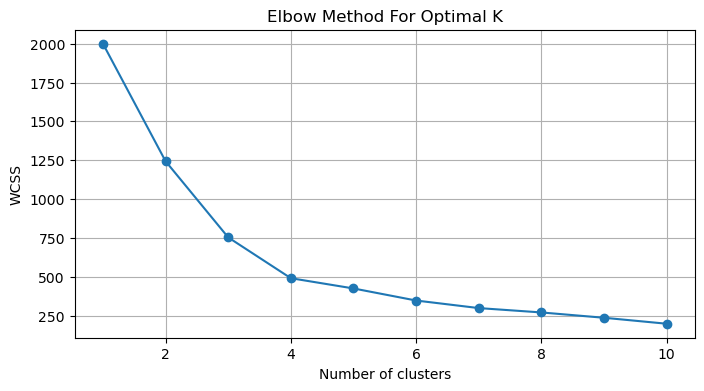

In [306]:
wcss = []  # within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

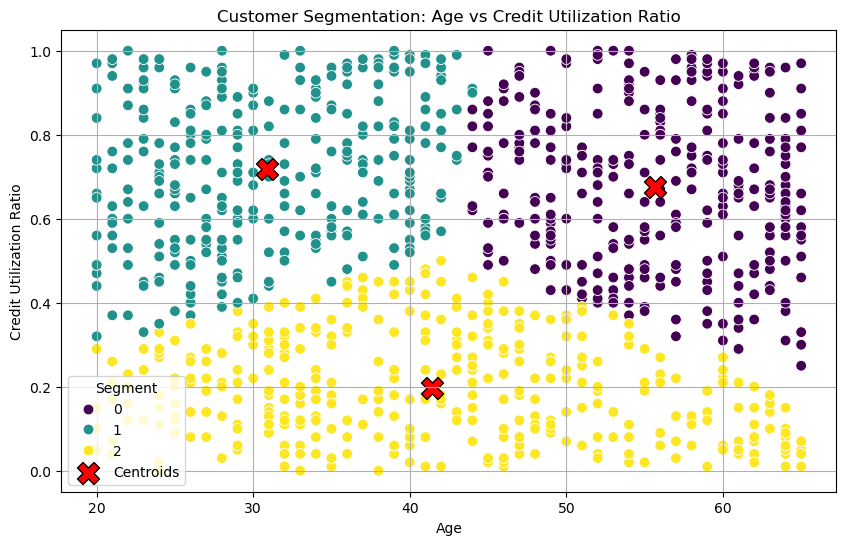

In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Select relevant features
features = ['Age', 'Credit Utilization Ratio']
X = df[features].dropna()

# Step 2: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Step 4: Assign clusters to dataframe
df_cleaned = df.loc[X.index].copy()
df_cleaned['Segment'] = clusters

# Step 5: Get cluster centers in original feature scale
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)

# Step 6: Plot using correct features (Age vs Credit Utilization Ratio)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cleaned,
    x='Age',
    y='Credit Utilization Ratio',
    hue='Segment',
    palette='viridis',
    s=60
)

# Plot centroids with same features
plt.scatter(
    x=centroids_original[:, 0],  # Age
    y=centroids_original[:, 1],  # Credit Utilization Ratio
    s=250,
    c='red',
    marker='X',
    edgecolor='black',
    label='Centroids'
)

# Final plot formatting
plt.title('Customer Segmentation: Age vs Credit Utilization Ratio')
plt.xlabel('Age')
plt.ylabel('Credit Utilization Ratio')
plt.legend(title='Segment')
plt.grid(True)
plt.show()

In [308]:
#  KMEAN CLUSTERING
# Choose optimal clusters, say K=3 based on elbow method
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
df['Customer_Segment'] = clusters
df.head()


,Age,Gender,Marital Status,Education,Employment,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Risk Flag,Log_Transformed,Customer_Segment
0,60,1,1,2,0,0.22,2685.0,2,4675000,2.65,48,2,1,0.198851,2
1,25,1,1,1,2,0.20,2371.0,9,3619000,5.19,60,0,1,0.182322,2
2,30,0,2,2,0,0.22,2771.0,6,957000,2.76,12,0,1,0.198851,2
3,58,0,1,3,2,0.12,1371.0,2,4731000,6.57,60,0,1,0.113329,2
4,32,1,1,0,1,0.99,828.0,2,3289000,6.28,36,2,1,0.688135,1


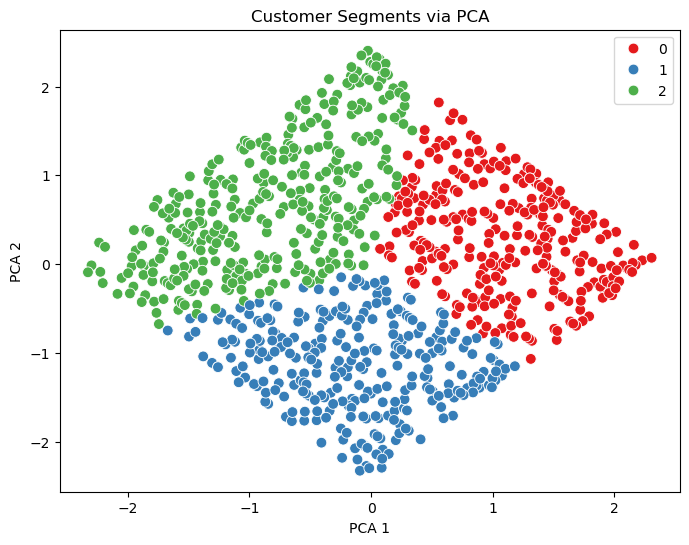

In [309]:
# VISUALIZING CLUSTERS USING PCA
# Reduce dimensions for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set1', s=60)
plt.title("Customer Segments via PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [310]:
# ANALYZE CLUSTER CHARTERSTICS
# Group by segment and get the mean of each feature
segment_summary = df.groupby('Customer_Segment')[features].describe()
print(segment_summary)

                    Age                                                      \
                  count       mean        std   min   25%   50%   75%   max   
Customer_Segment                                                              
0                 317.0  55.681388   6.111522  44.0  51.0  56.0  61.0  65.0   
1                 310.0  30.825806   6.694584  20.0  25.0  30.0  36.0  44.0   
2                 373.0  41.541555  11.885498  20.0  32.0  41.0  50.0  65.0   

                 Credit Utilization Ratio                                    \
                                    count      mean       std   min     25%   
Customer_Segment                                                              
0                                   317.0  0.675710  0.187943  0.25  0.5200   
1                                   310.0  0.717065  0.174141  0.32  0.5725   
2                                   373.0  0.196944  0.122091  0.00  0.1000   

                                      
           

In [311]:
# Step 1: Calculate average Credit Score per segment
segment_summary = df.groupby('Customer_Segment')['Credit Utilization Ratio'].mean()

# Step 2: Label segments based on average Credit Score
def label_segment(row):
    if row['Customer_Segment'] == segment_summary.idxmax():
        return 'High Credit utilisation'
    elif row['Customer_Segment'] == segment_summary.idxmin():
        return 'Low Credit utilisation'
    else:
        return 'Medium Credit utilisation'

# Step 3: Apply labeling
df['Segment_Label'] = df.apply(label_segment, axis=1)

# Step 4: View result
print(df[['Age', 'Credit Utilization Ratio', 'Customer_Segment', 'Segment_Label']].head())


   Age  Credit Utilization Ratio  Customer_Segment            Segment_Label
0   60                      0.22                 2   Low Credit utilisation
1   25                      0.20                 2   Low Credit utilisation
2   30                      0.22                 2   Low Credit utilisation
3   58                      0.12                 2   Low Credit utilisation
4   32                      0.99                 1  High Credit utilisation


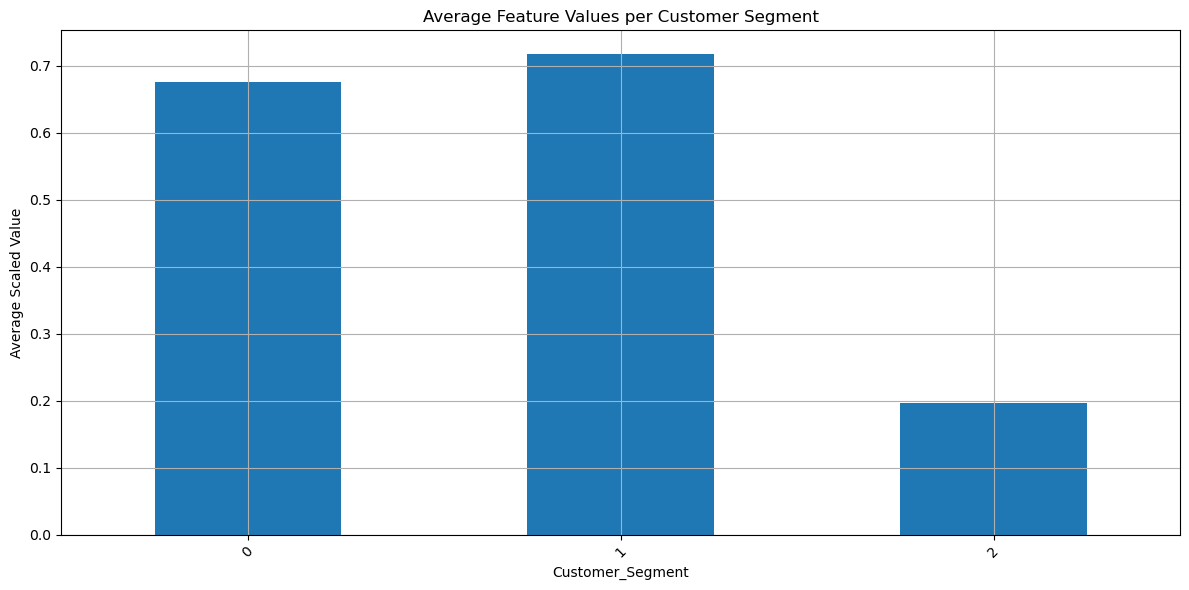

In [312]:
segment_summary.T.plot(kind='bar', figsize=(12, 6))
plt.title("Average Feature Values per Customer Segment")
plt.ylabel("Average Scaled Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Observation:A bar plot showing the average scaled feature values for each customer segment.
# we're plotting the transposed version of segment_summary, where:
# Rows = features
# Columns = customer segments (0, 1, 2)
# Bars = average values of each feature per segment
# What the Plot Shows:
# X-axis: Different features in your dataset (e.g., Age, Credit Score, Loan Amount, etc.)
# Y-axis: Average scaled value of each feature
# Colors:
# Blue → Segment 0
# Orange → Segment 1
# Green → Segment 2
# This bar plot helps you visually compare how each customer segment differs in average values across features.
# For example:
# If Segment 0 (blue) has a higher average in Age than others, it's likely to include older customers.
# If Segment 1 (orange) has a lower average in Credit Utilization, they might be more financially responsible.
# If Segment 2 (green) has lower averages across most features, they may be moderate or cautious users.


In [313]:
# Select important features for analysis
features_to_analyze = ['Age', 'Credit Utilization Ratio', 'Loan Amount', 'Interest Rate', 'Payment History']

# Group by customer segment
segment_summary = df.groupby('Customer_Segment')[features_to_analyze].mean()

# Display the updated summary
print(segment_summary)


                        Age  Credit Utilization Ratio   Loan Amount  \
Customer_Segment                                                      
0                 55.681388                  0.675710  2.566211e+06   
1                 30.825806                  0.717065  2.332506e+06   
2                 41.541555                  0.196944  2.506260e+06   

                  Interest Rate  Payment History  
Customer_Segment                                  
0                     10.788707      1405.526814  
1                     10.889161      1500.245161  
2                     10.431475      1453.581769  


In [314]:
# Define the mapping based on insights
segment_labels = {
    0: 'Older High Utilizers',
    1: 'Young Credit Actives',
    2: 'Moderate & Cautious Users'
}

# Create a new column with labeled segments
df['Segment_Label'] = df['Customer_Segment'].map(segment_labels)

# Preview
print(df[['Customer_Segment', 'Segment_Label']].head())


   Customer_Segment              Segment_Label
0                 2  Moderate & Cautious Users
1                 2  Moderate & Cautious Users
2                 2  Moderate & Cautious Users
3                 2  Moderate & Cautious Users
4                 1       Young Credit Actives


In [315]:
# # -very risky=2 ,good=1,risky=0
def categorize_credit_accounts(accounts):
    if accounts <= 3:
        return 'Low Credit Holders'
    elif 4 <= accounts <= 7:
        return 'Moderate Credit Users'
    else:
        return 'High Credit Active'
categorize_credit_accounts(6)

'Moderate Credit Users'

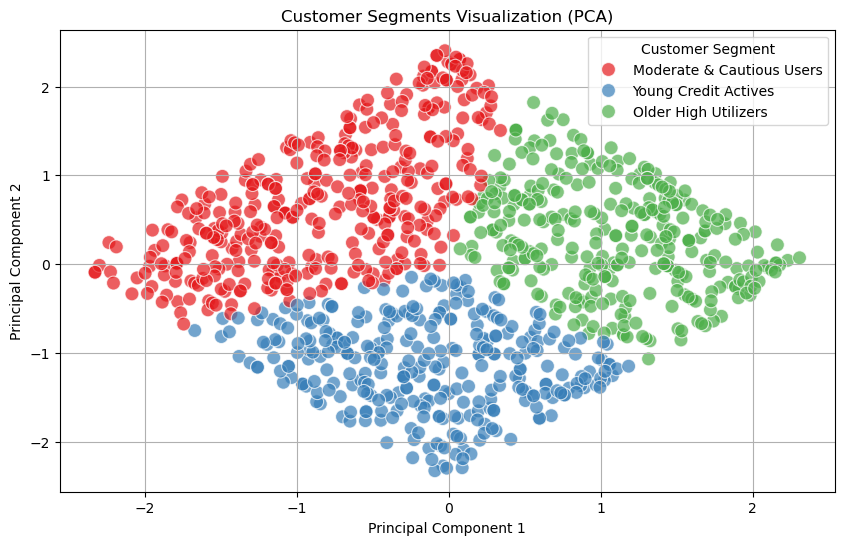

In [316]:
# Assuming you already added 'Customer_Segment' and labeled it in 'Segment_Label'
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for plotting
pca_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Segment_Label': df['Segment_Label']
})

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df,x='PCA1',y='PCA2',hue='Segment_Label',palette='Set1',s=100,alpha=0.7)
plt.title('Customer Segments Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Customer Segment')
plt.grid(True)
plt.show()


In [317]:
# Step 1: Define the new customer details
new_customer = {
    'Age': 35,
    'Credit Utilization Ratio': 0.60,
    'Loan Amount': 150000,
    'Interest Rate': 7.5,
    'Payment History': 85
}

# Step 2: Convert to DataFrame
new_customer_df = pd.DataFrame([new_customer])

# Step 3: Select only the features used for clustering
X_new = new_customer_df[features]  # Only 'Age' and 'Credit Utilization Ratio'

# Step 4: Scale the new customer data using the same scaler used earlier
X_new_scaled = scaler.transform(X_new)

# Step 5: Predict the cluster for the new customer
new_cluster = kmeans.predict(X_new_scaled)[0]

# Step 6: Assign segment label using the same mapping
new_segment_label = segment_labels.get(new_cluster, 'Unknown Segment')

# Step 7: Add cluster and label to the new customer DataFrame
new_customer_df['Customer_Segment'] = new_cluster
new_customer_df['Segment_Label'] = new_segment_label

# Step 8: Display the new customer with assigned segment
print(new_customer_df)

# Step 9 (Optional): Add the new customer to the original df
df = pd.concat([df, new_customer_df], ignore_index=True)


   Age  Credit Utilization Ratio  Loan Amount  Interest Rate  Payment History  \
0   35                       0.6       150000            7.5               85   

   Customer_Segment         Segment_Label  
0                 1  Young Credit Actives  


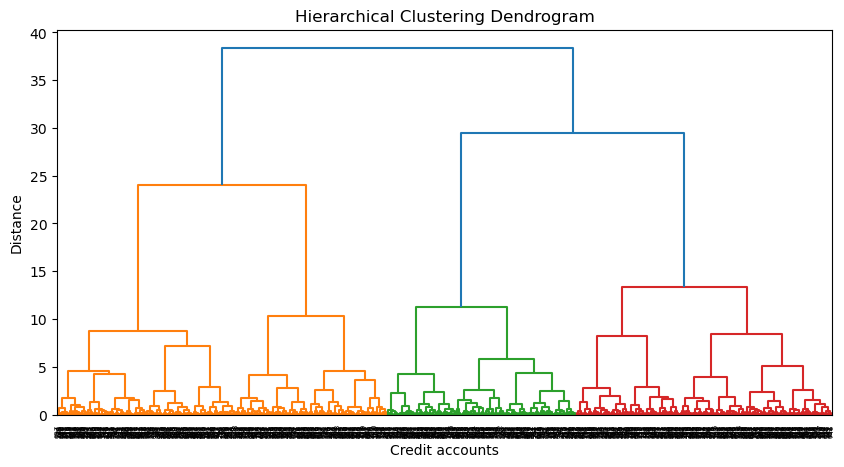

In [318]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(10,5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Credit accounts')
plt.ylabel('Distance')
plt.show()

In [ ]:
     -------- END PROJECT ---------------